## Cover Type Prediction

# Solal Danan


The goal is to predict the forest cover type (a categorical variable) from various informations related to an area. The metric used to rank you is the accuracy on a test set.


Supervised learning: we have access to both the features and the target and our goal is to train a model that can learn a mapping between the two
Classification: The cover type is a categorical variable

## 0 - Import Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 60)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.pipeline import make_pipeline

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

## 1 - Data cleaning and formatting

**First and Last Rows**

In [4]:
# Load the data
train = pd.read_csv('/Users/dnn/Data Science for Business 23-25/Master 1 - X/ML II/ML2 Project/data/train.csv')
#test = pd.read_csv('test-full.csv')

# Check the first few rows of the train dataset
print("Number of rows and columns in the trees dataset are:", train.shape)
train.head()

Number of rows and columns in the trees dataset are: (15120, 56)


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0  242642       2881     130     22                               210   
1  309891       3005     351     14                               242   
2  287847       3226      63     14                               618   
3  516307       3298     317      8                               661   
4  124860       3080      35      6                               175   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                              54                             1020   
1                             -16                             1371   
2                               2                             1092   
3                              60                              752   
4                              26                             3705   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            250             221             88   
1            194             215            159   
2            232             210            107   
3            198             233            174   
4            219             227            144   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                 342                 1                 0   
1                                 842                 0                 0   
2                                2018                 1                 0   
3                                1248                 0                 1   
4                                2673                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 1                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0            0            0            0            0            0   
1            0            0            0            0            1   
2            0            0            0            0            0   
3            0            0            0            1            0   
4            0            0            0            0            1   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            0   
1            0            0            0        

In [5]:
train.tail()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
15115  475155       3328     321     13                               323   
15116  514378       3455      37      5                               841   
15117  368425       3279      90     14                               404   
15118  537844       3589     357      9                               418   
15119  463634       3385     345     15                               350   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
15115                              12                             5109   
15116                              92                              939   
15117                             113                             1513   
15118                              52                             1868   
15119                              76                             3625   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
15115            186             227            180   
15116            220             229            146   
15117            240             218            105   
15118            205             223            155   
15119            190             216            164   

       Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
15115                                3151                 0                 0   
15116                                 362                 0                 1   
15117                                1503                 1                 0   
15118                                1657                 0                 1   
15119                                3327                 0                 0   

       Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
15115                 1                 0           0           0           0   
15116                 0                 0           0           0           0   
15117                 0                 0           0           0           0   
15118                 0                 0           0           0           0   
15119                 1                 0           0           0           0   

       Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
15115           0           0           0           0           0           0   
15116           0           0           0           0           0           0   
15117           0           0           0           0           0           0   
15118           0           0           0           0           0           0   
15119           0           0           0           0           0           0   

       Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
15115            0            0            0            0            0   
15116            0            0            0            0            0   
15117            0            0            0            0            0   
15118            0            0            0            0            0   
15119            0            0            0            0            0   

       Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
15115            0            0            0            0            0   
15116            0            0            0            0            0   
15117            0            0            0            0            0   
15118            0            0            0            0            0   
15119            0            0            0            0            0   

       Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
15115            0            0            0            0            0   
15116            0            0            0            0            0   
15117            0            0            0            0            0   
15118            0            0            0            0            0   
15119            0            0            0       

**Information (how many rows and columns, data types and non-null values) and descriptive statistics of the dataset**

In [6]:
# Summary statistics
train.describe()

Id     Elevation        Aspect         Slope  \
count   15120.000000  15120.000000  15120.000000  15120.000000   
mean   267008.526389   2748.649934    155.834524     16.556746   
std    179261.722330    419.009589    109.745372      8.534602   
min         5.000000   1877.000000      0.000000      0.000000   
25%    103705.000000   2373.000000     65.000000     10.000000   
50%    276034.500000   2754.000000    125.000000     15.000000   
75%    398150.250000   3109.000000    257.000000     22.000000   
max    581005.000000   3850.000000    360.000000     50.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         228.376521                       51.311706   
std                          209.196381                       61.520488   
min                            0.000000                     -135.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       80.000000   
max                         1376.000000                      570.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1717.977712     213.028836      218.865741   
std                        1330.263450      30.638406       22.797288   
min                           0.000000      52.000000       99.000000   
25%                         760.000000     197.000000      207.000000   
50%                        1315.000000     220.000000      223.000000   
75%                        2292.000000     236.000000      235.000000   
max                        6803.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Wilderness_Area1  \
count   15120.000000                        15120.000000      15120.000000   
mean      134.477116                         1527.357804          0.235979   
std        46.070054                         1116.636997          0.424623   
min         0.000000                            0.000000          0.000000   
25%       106.000000                          750.000000          0.000000   
50%       138.000000                         1266.000000          0.000000   
75%       166.000000                         2002.000000          0.000000   
max       251.000000                         7095.000000          1.000000   

       Wilderness_Area2  Wilderness_Area3  Wilderness_Area4    Soil_Type1  \
count      15120.000000      15120.000000       15120.00000  15120.000000   
mean           0.037632          0.416799           0.30959      0.022421   
std            0.190312          0.493045           0.46234      0.148052   
min            0.000000          0.000000           0.00000      0.000000   
25%            0.000000          0.000000           0.00000      0.000000   
50%            0.000000          0.000000           0.00000      0.000000   
75%            0.000000          1.000000           1.00000      0.000000   
max            1.000000          1.000000           1.00000      1.000000   

         Soil_Type2    Soil_Type3    Soil_Type4    Soil_Type5    Soil_Type6  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.041468      0.066534      0.055489      0.011971      0.044907   
std        0.199377      0.249222      0.228941      0.108758      0.207108   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.00000

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [12]:
# Check for missing values
train.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


**Check for Extreme Outliers**

To help future ML model to grasp patterns in the data better, I am going to search for outliers. During this search, I will use the logic of [extreme outliers](https://people.richland.edu/james/lecture/m170/ch03-pos.html) to keep as much rows I can keep. So following data points will be dropped if they satisfy the following conditions:    
- x < Q1 - 3 * IQR       
- x > Q3 + 3 * IQR

In [13]:
def outlier_function(df, col_name):
    ''' this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile

    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0

    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [14]:
# loop through all columns to see if there are any outliers
for column in train.columns:
    if outlier_function(train, column)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(train, column)[2], column))

There are 31 outliers in Horizontal_Distance_To_Hydrology
There are 51 outliers in Vertical_Distance_To_Hydrology
There are 1 outliers in Horizontal_Distance_To_Roadways
There are 8 outliers in Hillshade_9am
There are 15 outliers in Hillshade_Noon
There are 16 outliers in Horizontal_Distance_To_Fire_Points
There are 3410 outliers in Wilderness_Area1
There are 569 outliers in Wilderness_Area2
There are 339 outliers in Soil_Type1
There are 627 outliers in Soil_Type2
There are 1006 outliers in Soil_Type3
There are 839 outliers in Soil_Type4
There are 181 outliers in Soil_Type5
There are 679 outliers in Soil_Type6
There are 1 outliers in Soil_Type7
There are 2 outliers in Soil_Type8
There are 4 outliers in Soil_Type9
There are 2096 outliers in Soil_Type10
There are 376 outliers in Soil_Type11
There are 209 outliers in Soil_Type12
There are 513 outliers in Soil_Type13
There are 173 outliers in Soil_Type14
There are 102 outliers in Soil_Type16
There are 640 outliers in Soil_Type17
There are 

Close look for the outlier elimination for the following columns:
* Horizontal_Distance_To_Hydrology
* Vertical_Distance_To_Hydrology
* Horizontal_Distance_To_Roadways
* Horizontal_Distance_To_Fire_Points

No other columns for potential outlier elimination because their data range is already fixed between 0 and 255 (e.g. Hillsahde columns)  or they seem like one-hot-encoded columns (e.g. Soil type and Wilderness areas).

Recall the data ranges of those 4 columns:
* Horizontal_Distance_To_Hydrology: 0, 1343
* Vertical_Distance_To_Hydrology: -146, 554
* Horizontal_Distance_To_Roadways: 0, 6890
* Horizaontal_Distance_To_Firepoints: 0, 6993

Considering the Horizaontal_Distance_To_Firepoints having the highest number of outliers and widest data range, I am going to remove outliers only from that column.




In [15]:
train = train[(train['Horizontal_Distance_To_Fire_Points'] > outlier_function(train, 'Horizontal_Distance_To_Fire_Points')[0]) &
              (train['Horizontal_Distance_To_Fire_Points'] < outlier_function(train, 'Horizontal_Distance_To_Fire_Points')[1])]
train.shape

(14946, 56)

**Findings from Understand, Clean and Format Data**


Training dataset has 15120 entries and 56 columns with headers appropriately named. Dataset is clean and well-formatted, meaning it had no NA values and every column has a numeric (float or integer) data type.

4 columns had outliers, outliers of the `Horizontal_Distance_To_Fire_Points` is removed considering this column has a wider range and has the most number of outliers. **But not too much outlier in the the dataset**

`Cover_Type` is our label/target column. `Wilderness_Area` and `Soil_Type` columns might have binary values (0,1) if so, they are the one-hot-encoded columns of 4 wilderness areas and 40 soil types respectively.

## 2 - Exploratory data analysis EDA

Let's explore the distribution of numerical features in more detail, including histograms and kernel density estimations, and box plots. We will:
- Investigate the relationships between numerical features and the target variable (Cover_Type).
- Examine the distribution of categorical features and their impact on the target variable.
- Detect and handle any outliers or anomalies in the dataset.

**Verfication of One Hot Encoded Variable**

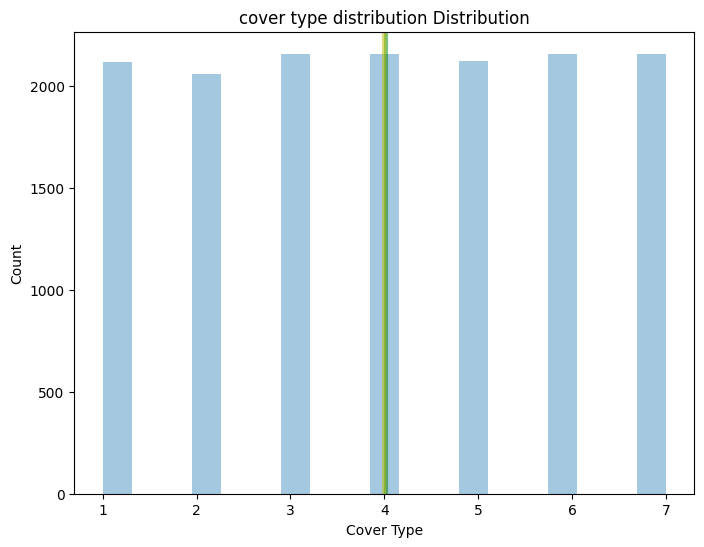

In [16]:
# set the plot size
plt.figure(figsize=(8, 6))
# set the histogram, mean and median
sns.distplot(train["Cover_Type"], kde=False)
plt.axvline(x=train.Cover_Type.mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=train.Cover_Type.median(), linewidth=3, color='y', label="median", alpha=0.5)
plt.xlabel('Cover Type'); plt.ylabel('Count'); 
plt.title('cover type distribution Distribution');


`Wilderness_Area` and `Soil_Type1-40` having only binary values and only one `soil_type` or `wilderness_area` being equal to 1, shows that they are one-hot-encoded columns.

One important thing about fantastic trees are, they can only belong to one soil type or one wilderness area.

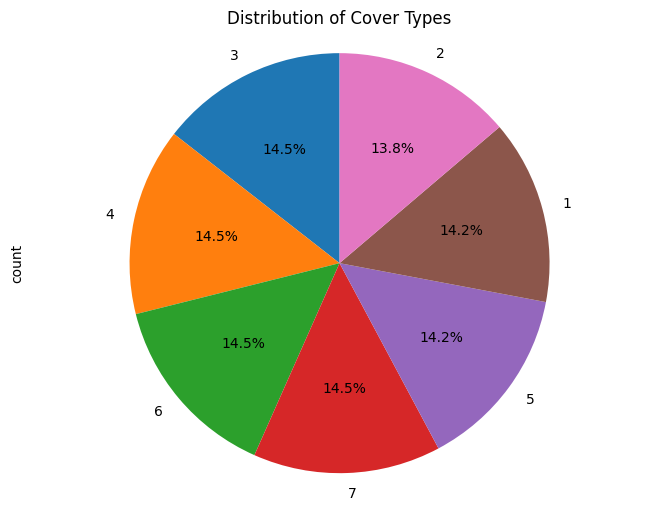

In [17]:
plt.figure(figsize=(8, 6))
train['Cover_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Cover Types')
plt.axis('equal')
plt.show()

**No worries about class imbalances during the model training phase**

Distribution of fantastic trees shows perfect uniform distribution.

Here are the 7 types of the fantastic trees, numbered from 1 to 7 in the `Cover_Type` column:

1) Spruce/Fir

2) Lodgepole Pine

3) Ponderosa Pine

4) Cottonwood/Willow

5) Aspen

6) Douglas-fir

7) Krummholz

## Distribution and relationship of continuous variables (Elevation, Aspect, Slope, Distance and Hillsahde columns)

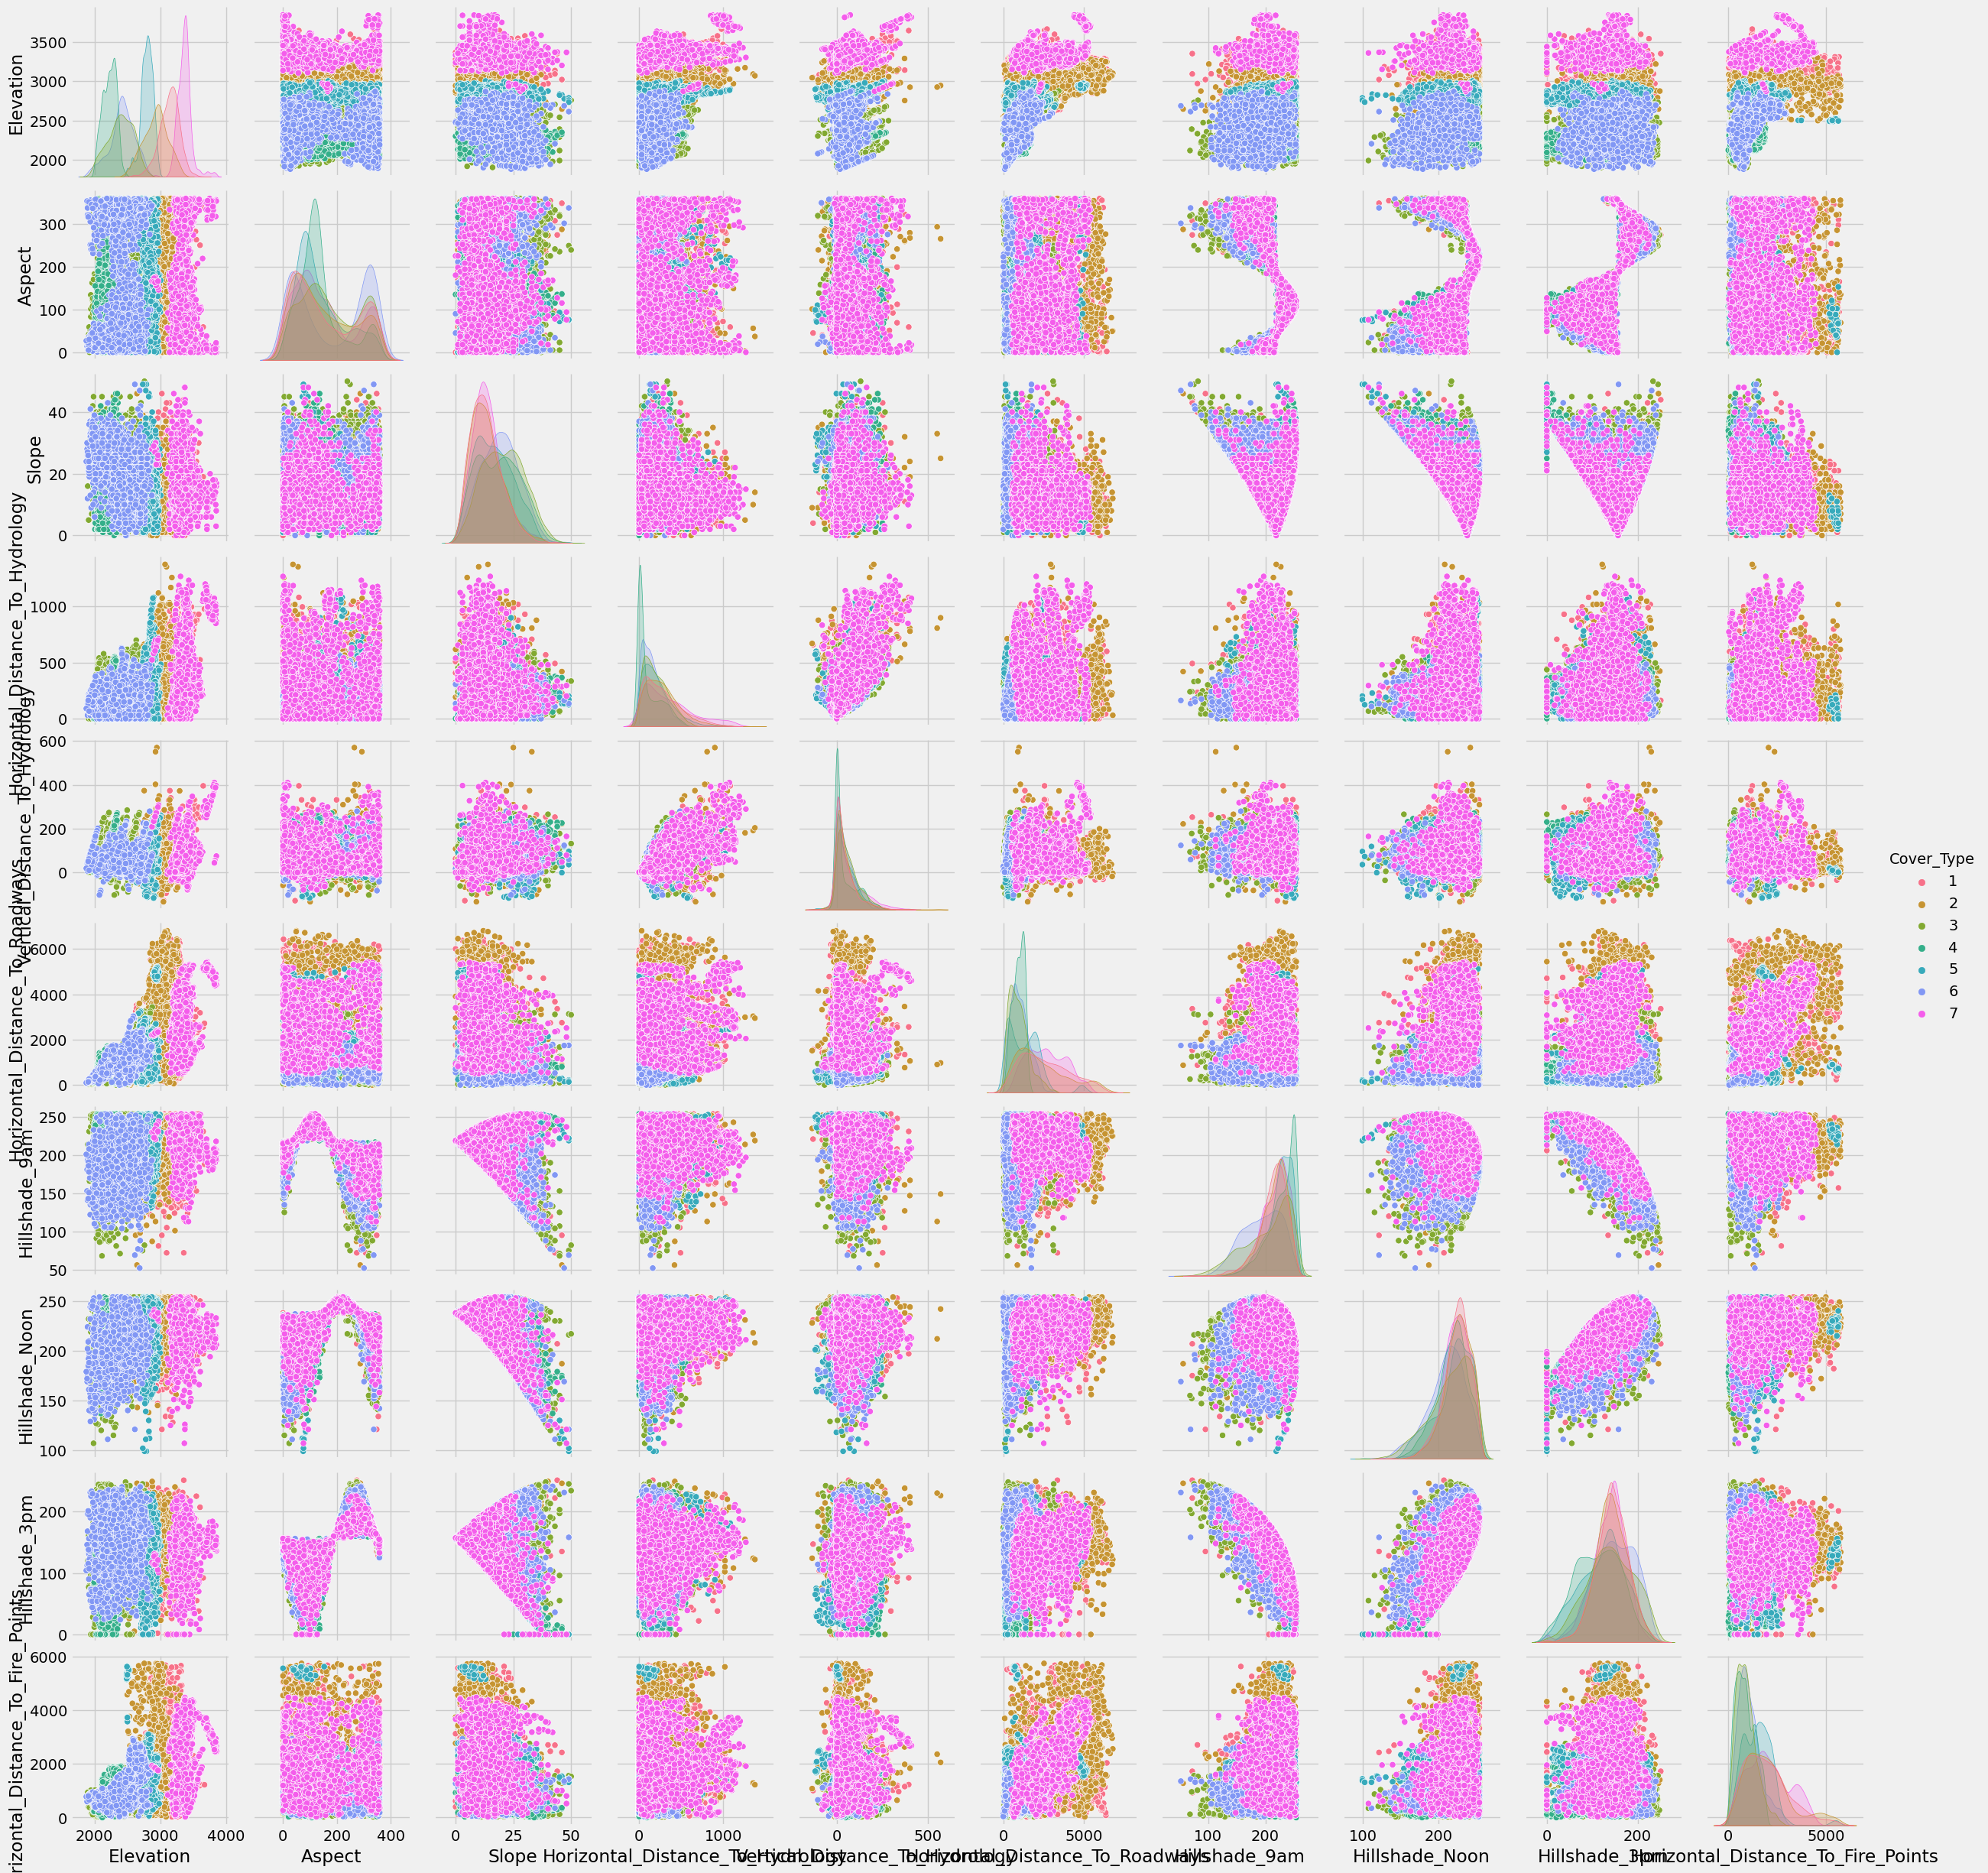

In [34]:
custom_palette = sns.color_palette("husl", 7)  # Using HUSL color palette with 7 distinct colors for 7 cover types

# Pairplot to visualize relationships between numerical features with custom colors
sns.pairplot(train[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm' ,'Horizontal_Distance_To_Fire_Points', 'Cover_Type']],
             hue='Cover_Type', diag_kind='kde', palette=custom_palette)

It's seems like elevation is important feature

**Distributions:**
* `Hillshade_9am` and `Hillshade_Noon`left-skewed distributions.

* `Horizontal_Distance_To_Firepoints`, `Horizontal_Distance_To_Roadways`, `Horizontal_Distance_To_Hydrology`right-skewed distributions.

* `Elevation` (height of a trees) approx a uniform distribution.

* `Slope`, `Hillshade_3pm` shows a symmetric distribution.

**Some obvious relationships between the continuous features:**
*  `Elevation` and shows positive trend with following variables:
   * `Vertical_Distance_To_Hydrology`
   * `Horizontal_Distance_To_Roadways`
   * `Horizontal_Distance_To_Firepoints`
   * `Horizontal_Distance_To_Hydrology`

* As `Aspect` increases; `Hillshade_Noon` and `Hillshade_3pm` increases.

* `Slope` has negative trend with:
  * `Horizontal_Distance_To_Roadways`
  * `Hillshade_9am`, `Hillshade_Noon` and `Hillshade_3pm`
  * `Horizontal_Distance_To_Firepoints`

* `Horizontal_Distance_To_Hydrology`  has positive trend with:
  * `Horizontal_Distance_To_Firepoints`
  * `Horizontal_Distance_To_Roadways`
  * `Vertical_Distance_To_Hydrology`

* `Vertical_Distance_To_Hydrology` - `Slope` and - `Horizontal_Distance_To_Hydrology` has obvious collinear relationship.

* As `Horizontal_Distance_To_Roadways` increases, `Horizontal_Distance_To_Firepoints` increases and `Slope` decreases.

* `Hillshade_9am` shows negative trend with `Hillshade_3pm` and `Aspect`, as `Hillshade_9am` increases `Elevation` increases.

* `Hillshade_Noon` has positive trend with:
  * `Elevation`
  * `Aspect`
  * `Horizontal_Distance_To_Roadways`
  * `Hillshade_3pm`
  * `Horizontal_Distance_To_Firepoints`

* `Hillshade_3pm` shows perfect negative relationship with `Hillshade_9am` and perfect positive relationship with `Hillshade_Noon`.

**Some Collinear features:**
* hillshade noon - hillshade 3 pm
* hillsahde 3 pm - hillshade 9 am
* vertical distance to hydrology - horizontal distance to hydrology
* elevation - slope

**Check if the Cover_Type shows non-uniform distribution among different Wilderness_Areas**

Text(0.5, 1.0, 'Density of Cover Types Among Different Wilderness Areas')

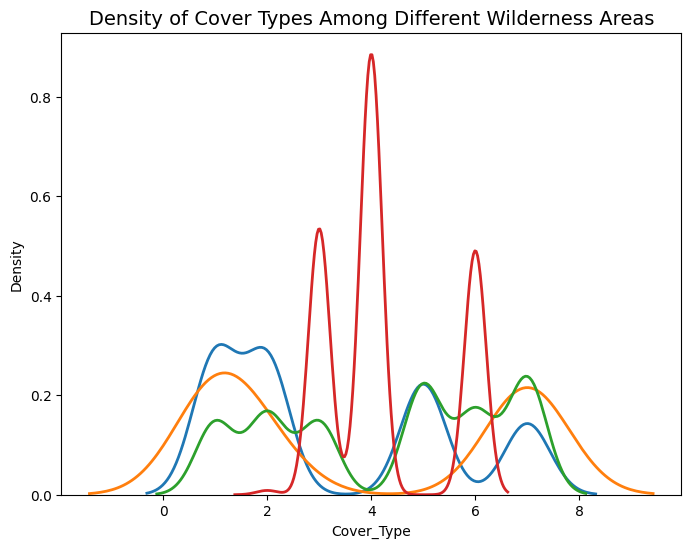

In [18]:
# Create one column as Wilderness_Area_Type and represent it as categorical data
train['Wilderness_Area_Type'] = (train.iloc[:, 11:15] == 1).idxmax(1)

#list of wilderness areas
wilderness_areas = sorted(train['Wilderness_Area_Type'].value_counts().index.tolist())

# distribution of the cover type in different wilderness areas
plt.figure(figsize=(8, 6))

# plot cover_type distribution for each wilderness area
for area in wilderness_areas:
    subset = train[train['Wilderness_Area_Type'] == area]
    sns.kdeplot(subset["Cover_Type"], label=area, linewidth=2)

# set title, legends and labels
plt.ylabel("Density")
plt.xlabel("Cover_Type")
plt.title("Density of Cover Types Among Different Wilderness Areas", size=14)

Another important finding about Fantastic Trees: Wilderness area is an important feature to determine the cover type:
* Spruce/Fir, Lodgepole Pine and Krummholz (Cover_Type 1, 2, 7)  mostly found in Rawah, Neota and Comanche Peak Wilderness Area(1,2 and 3).
* It is highly likely to find Ponderosa Pine (Cover_Type 3) in Cache la Poudre Wilderness Area (4) rather than other areas.
* Cottonwood/Willow (Cover_Type 4) seems to be found only in Cache la Poudre Wilderness Area (4).
* Aspen (Cover_Type 5) is equally likely to come from wilderness area Rawah and Comanche (1,3).
* Douglas-fir (Cover_Type 6) can be found in any of the wilderness areas.

Note that, distribution of cover types extend more than the range because of the kernel density estimation.

 ## Pearson coefficients with numeric Soil_Type representation

Since different soil types might appear in different wilderness areas, I am going to consider different wilderness areas while examining this relationship.

In [19]:
def split_numbers_chars(row):
    '''This function fetches the numerical characters at the end of a string
    and returns alphabetical character and numerical chaarcters respectively'''
    head = row.rstrip('0123456789')
    tail = row[len(head):]
    return head, tail

def reverse_one_hot_encode(dataframe, start_loc, end_loc, numeric_column_name):
    ''' this function takes the start and end location of the one-hot-encoded column set and numeric column name to be created as arguments
    1) transforms one-hot-encoded columns into one column consisting of column names with string data type
    2) splits string column into the alphabetical and numerical characters
    3) fetches numerical character and creates numeric column in the given dataframe
    '''
    dataframe['String_Column'] = (dataframe.iloc[:, start_loc:end_loc] == 1).idxmax(1)
    dataframe['Tuple_Column'] = dataframe['String_Column'].apply(split_numbers_chars)
    dataframe[numeric_column_name] = dataframe['Tuple_Column'].apply(lambda x: x[1]).astype('int64')
    dataframe.drop(columns=['String_Column','Tuple_Column'], inplace=True)

In [20]:
reverse_one_hot_encode(train, 16, 56, "Soil_Type")

In [21]:
train

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0      242642       2881     130     22                               210   
1      309891       3005     351     14                               242   
2      287847       3226      63     14                               618   
3      516307       3298     317      8                               661   
4      124860       3080      35      6                               175   
...       ...        ...     ...    ...                               ...   
15115  475155       3328     321     13                               323   
15116  514378       3455      37      5                               841   
15117  368425       3279      90     14                               404   
15118  537844       3589     357      9                               418   
15119  463634       3385     345     15                               350   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                  54                             1020   
1                                 -16                             1371   
2                                   2                             1092   
3                                  60                              752   
4                                  26                             3705   
...                               ...                              ...   
15115                              12                             5109   
15116                              92                              939   
15117                             113                             1513   
15118                              52                             1868   
15119                              76                             3625   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0                250             221             88   
1                194             215            159   
2                232             210            107   
3                198             233            174   
4                219             227            144   
...              ...             ...            ...   
15115            186             227            180   
15116            220             229            146   
15117            240             218            105   
15118            205             223            155   
15119            190             216            164   

       Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                     342                 1                 0   
1                                     842                 0                 0   
2                                    2018                 1                 0   
3                                    1248                 0                 1   
4                                    2673                 1                 0   
...                                   ...               ...               ...   
15115                                3151                 0                 0   
15116                                 362                 0                 1   
15117                                1503                 1                 0   
15118                                1657                 0                 1   
15119                                3327                 0                 0   

       Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                     0                 0           0           0           0   
1                     1                 0           0           0           0   
2                     0                 0           0           0           0   
3                     0                 0           0           0           0   
4                     0                 0           0           0           0   
...                 ...               ...         ...         ...         ...

Text(0.5, 1.0, 'Pearson Correlation of Features with Numeric Soil_Type')

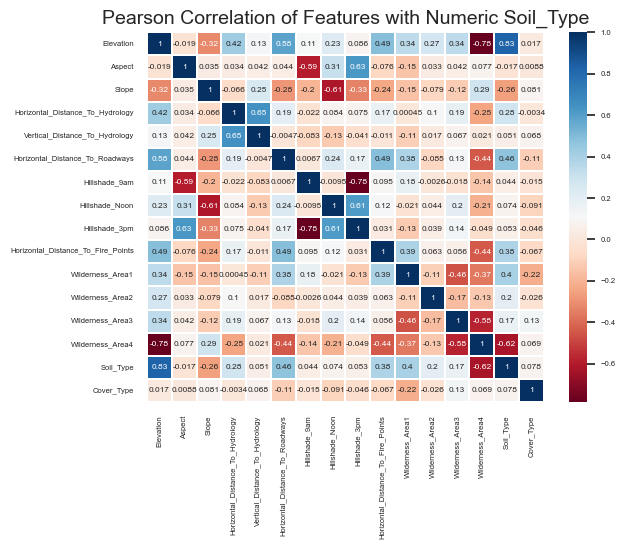

In [22]:
# store continious variables in a list
continuous_variables = train.columns[1:11].tolist()

# make a list of numeric features and create a dataframe with them
all_features_w_label = continuous_variables + wilderness_areas + ["Soil_Type"] + ["Cover_Type"]
train_w_numeric_soil = train[all_features_w_label]

# pearson coefficients with numeric soil type column
correlations = pd.DataFrame(train_w_numeric_soil.corr())

figsize=(20,30)
sns.set(font_scale=.5)  # Increase font scale for labels

# plot the heatmap
colormap = plt.cm.RdBu
sns.heatmap(correlations,linewidths=0.1,
            square=False, cmap=colormap, linecolor='white', annot=True)
plt.title('Pearson Correlation of Features with Numeric Soil_Type', size=14)

## Findings From Exploratory Data Analysis
<p> Data set have balanced labels, resulting in equal number of cover types. This will be an advantage when it comes to apply classification ML models because, the model will have good chance to learn patterns of all labels, eliminating the probability of underfitting. <p/>
<p> Different wilderness areas consist of some specific trees. Interestingly, there is one fantastic tree, Cottonwood/Willow, specifically likes to grow in wilderness area 4. While cover types 1, 2, 5 and 6 can grow in any soil type, other cover types grows more with specific soil types. <p/>
<p> Soil types are reverse-one-hot-encoded, meaning they are going to be included as numeric data in the training set and one-hot-encoded soil type columns will be excluded. With that way, there is a stronger correlation between soil type and Cover_Type. Numeric soil type column and other variables have pearson coefficients in the range of [-0.2, 0.1]. <p/>
<p> Hillshade columns are collinear within each other and Hillshade_9am has the least importance in determining Cover_Type. Thus this column will be dropped in Part 3 for better interpretability of the future model. <p/>


**Features that are strongly correlated with each other are known as collinear and removing one of the variables in these pairs of features can often help a machine learning model generalize and be more interpretable.**

# 3 - Feature Engineering & Selection

In [24]:
train = pd.read_csv('/Users/dnn/Data Science for Business 23-25/Master 1 - X/ML II/ML2 Project/data/train.csv')
train = train[(train['Horizontal_Distance_To_Fire_Points'] > outlier_function(train, 'Horizontal_Distance_To_Fire_Points')[0]) &
              (train['Horizontal_Distance_To_Fire_Points'] < outlier_function(train, 'Horizontal_Distance_To_Fire_Points')[1])]
reverse_one_hot_encode(train, 16, 56, "Soil_Type")
reverse_one_hot_encode(train, 11, 15, "Wilderness_Area")


# make a list of numeric features and create a dataframe with them
all_features_w_label = continuous_variables + wilderness_areas + ["Wilderness_Area"] + ["Soil_Type"] + ["Cover_Type"]
train = train[all_features_w_label]
train

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0           2881     130     22                               210   
1           3005     351     14                               242   
2           3226      63     14                               618   
3           3298     317      8                               661   
4           3080      35      6                               175   
...          ...     ...    ...                               ...   
15115       3328     321     13                               323   
15116       3455      37      5                               841   
15117       3279      90     14                               404   
15118       3589     357      9                               418   
15119       3385     345     15                               350   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                  54                             1020   
1                                 -16                             1371   
2                                   2                             1092   
3                                  60                              752   
4                                  26                             3705   
...                               ...                              ...   
15115                              12                             5109   
15116                              92                              939   
15117                             113                             1513   
15118                              52                             1868   
15119                              76                             3625   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0                250             221             88   
1                194             215            159   
2                232             210            107   
3                198             233            174   
4                219             227            144   
...              ...             ...            ...   
15115            186             227            180   
15116            220             229            146   
15117            240             218            105   
15118            205             223            155   
15119            190             216            164   

       Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                     342                 1                 0   
1                                     842                 0                 0   
2                                    2018                 1                 0   
3                                    1248                 0                 1   
4                                    2673                 1                 0   
...                                   ...               ...               ...   
15115                                3151                 0                 0   
15116                                 362                 0                 1   
15117                                1503                 1                 0   
15118                                1657                 0                 1   
15119                                3327                 0                 0   

       Wilderness_Area3  Wilderness_Area4  Wilderness_Area  Soil_Type  \
0                     0                 0                1         30   
1                     1                 0                3         24   
2                     0                 0                1         29   
3                     0                 0                2         23   
4                     0                 0                1         24   
...                 ...               ...              ...        ...   
15115                 1                 0                3         38   
15116                 0                 0                2         40  

In [25]:
new_features = []

### Handle missing values (already done in the previous preprocessing)



### Add & Transform Features

After doing some Google Search about the features, maybe adding some features might help achieving stronger correlations. 

I decided to add linear combinations of the horizontal distance columns and  Euclidian distance of Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology as suggested in this [presentation](https://www.slideshare.net/danielgribel/forest-cover-type-prediction-56288946?next_slideshow=2).

* Elevation and Vertical Distance to Hydrology
* Horizontal Distance to Hydrology and Horizontal Distance to Firepoints
* Horizontal Distance to Hydrology and Horizontal Distance to Roadways 
* Horizontal Distance to Firepoints and Horizontal Distance to Roadways
* Euclidian Distance of Horizontal Distance to Hydrology and Vertical Distance to Hydrology

After the addition and transformation, I will check pearson coefficients again.

In [26]:
# add columns
train['Euclidian_Distance_To_Hydrology'] = (train['Horizontal_Distance_To_Hydrology']**2 + 
                                                           train['Vertical_Distance_To_Hydrology']**2)**0.5
train['Mean_Elevation_Vertical_Distance_Hydrology'] = (train['Elevation'] + 
                                                                     train['Vertical_Distance_To_Hydrology'])/2
train['Mean_Distance_Hydrology_Firepoints'] = (train['Horizontal_Distance_To_Hydrology'] + 
                                                              train['Horizontal_Distance_To_Fire_Points'])/2
train['Mean_Distance_Hydrology_Roadways'] = (train['Horizontal_Distance_To_Hydrology'] + 
                                                            train['Horizontal_Distance_To_Roadways'])/2
train['Mean_Distance_Firepoints_Roadways'] = (train['Horizontal_Distance_To_Fire_Points'] + 
                                                             train['Horizontal_Distance_To_Roadways'])/2


new_features.append('Euclidian_Distance_To_Hydrology')
new_features.append('Mean_Elevation_Vertical_Distance_Hydrology')
new_features.append('Mean_Distance_Hydrology_Firepoints')
new_features.append('Mean_Distance_Hydrology_Roadways')
new_features.append('Mean_Distance_Firepoints_Roadways')

## Square Root Transformation

La transformation par racine carrée est une technique couramment utilisée en ingénierie des caractéristiques, notamment pour atténuer les problèmes posés par les distributions asymétriques des données. I will perform square root transformation to the features with positive data range. Square root transformation might help especially for the highly skewed distributions.
En effet, Square rooot transofrmation, Réduction de l'asymétrie et Amélioration de la linéarité


We saw earlier that:
* `Hillshade_9am` and `Hillshade_Noon`left-skewed distributions.

* `Horizontal_Distance_To_Firepoints`, `Horizontal_Distance_To_Roadways`, `Horizontal_Distance_To_Hydrology`right-skewed distributions.

In [27]:
# Specifying the columns to transform
columns_to_transform = ['Hillshade_Noon','Euclidian_Distance_To_Hydrology', 'Horizontal_Distance_To_Fire_Points', 'Horizontal_Distance_To_Roadways', "Mean_Distance_Hydrology_Roadways"]

# Applying square root transformation only to the specified columns
for col in columns_to_transform:
    # Adding the transformed columns with a 'sqrt_' prefix
    train['sqrt_' + col] = np.sqrt(train[col])
    new_features.append('sqrt_' + col)

## Interaction Features
   
- Identify pairs of numerical features that might have meaningful interactions.
- Create new features by performing mathematical operations (e.g., addition, multiplication, division) on these feature pairs.
- Explore domain knowledge or intuition to guide the creation of interaction features.

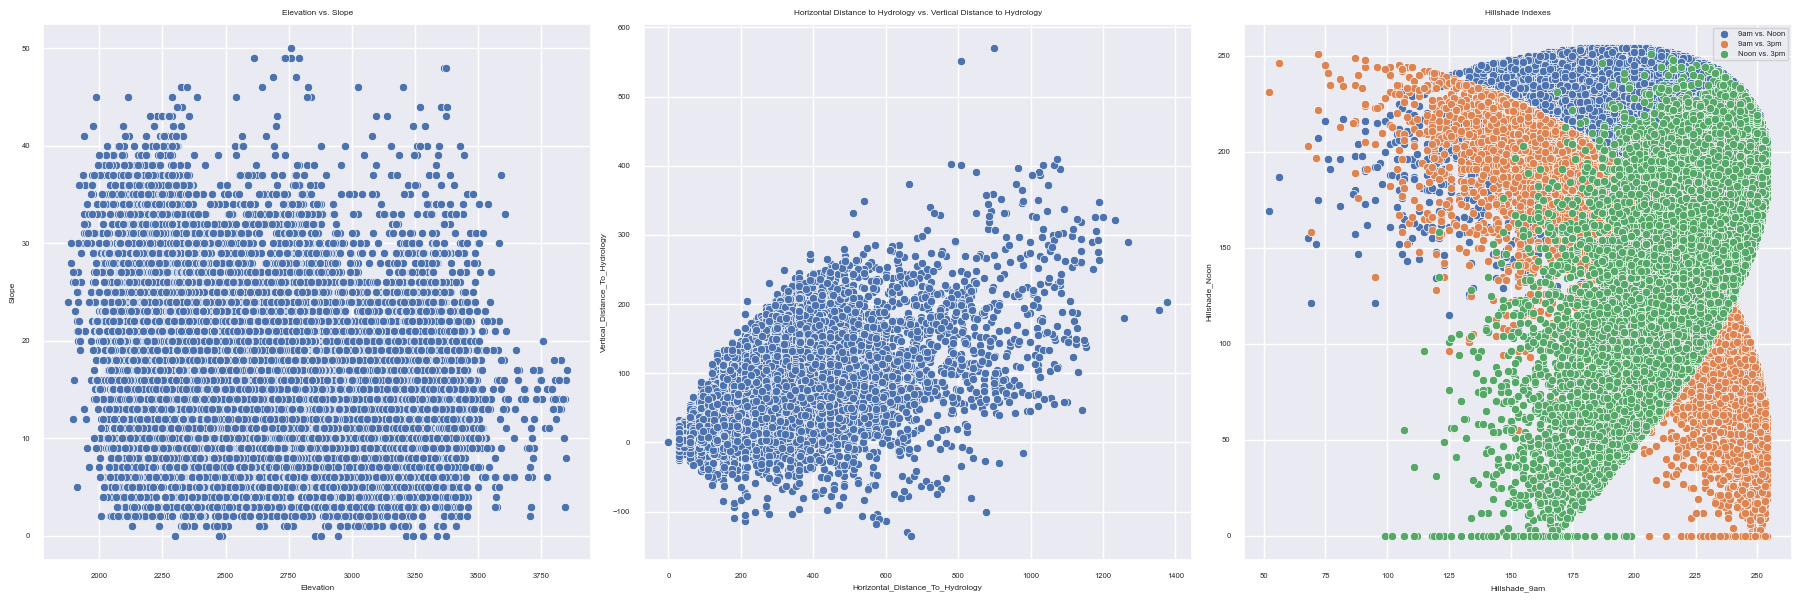

In [28]:
# Assuming 'train' is your DataFrame that has already been defined

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # Adjusted figsize for better visibility

# Scatter plot for Elevation vs. Slope
sns.scatterplot(data=train, x='Elevation', y='Slope', ax=axes[0])
axes[0].set_title('Elevation vs. Slope')

# Scatter plot for Horizontal Distance to Hydrology vs. Vertical Distance to Hydrology
sns.scatterplot(data=train, x='Horizontal_Distance_To_Hydrology', y='Vertical_Distance_To_Hydrology', ax=axes[1])
axes[1].set_title('Horizontal Distance to Hydrology vs. Vertical Distance to Hydrology')

# Scatter plot for Hillshade Indexes
sns.scatterplot(data=train, x='Hillshade_9am', y='Hillshade_Noon', ax=axes[2], label='9am vs. Noon')
sns.scatterplot(data=train, x='Hillshade_9am', y='Hillshade_3pm', ax=axes[2], label='9am vs. 3pm')
sns.scatterplot(data=train, x='Hillshade_Noon', y='Hillshade_3pm', ax=axes[2], label='Noon vs. 3pm')
axes[2].set_title('Hillshade Indexes')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [29]:
# Define interaction features based on the provided pairs
# Interaction feature 1: Elevation * Slope
train['Elevation_Slope'] = train['Elevation'] * train['Slope']

# Interaction feature 2: Horizontal_Distance_To_Hydrology * Vertical_Distance_To_Hydrology
train['HD_Hydrology_VD_Hydrology'] = train['Horizontal_Distance_To_Hydrology'] * train['Vertical_Distance_To_Hydrology']

# Interaction feature 3: Aspect * Slope
train['Aspect_Slope'] = train['Aspect'] * train['Slope']


new_features.append('Elevation_Slope')
new_features.append('HD_Hydrology_VD_Hydrology')
new_features.append('Aspect_Slope')

train

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0           2881     130     22                               210   
1           3005     351     14                               242   
2           3226      63     14                               618   
3           3298     317      8                               661   
4           3080      35      6                               175   
...          ...     ...    ...                               ...   
15115       3328     321     13                               323   
15116       3455      37      5                               841   
15117       3279      90     14                               404   
15118       3589     357      9                               418   
15119       3385     345     15                               350   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                  54                             1020   
1                                 -16                             1371   
2                                   2                             1092   
3                                  60                              752   
4                                  26                             3705   
...                               ...                              ...   
15115                              12                             5109   
15116                              92                              939   
15117                             113                             1513   
15118                              52                             1868   
15119                              76                             3625   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0                250             221             88   
1                194             215            159   
2                232             210            107   
3                198             233            174   
4                219             227            144   
...              ...             ...            ...   
15115            186             227            180   
15116            220             229            146   
15117            240             218            105   
15118            205             223            155   
15119            190             216            164   

       Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                     342                 1                 0   
1                                     842                 0                 0   
2                                    2018                 1                 0   
3                                    1248                 0                 1   
4                                    2673                 1                 0   
...                                   ...               ...               ...   
15115                                3151                 0                 0   
15116                                 362                 0                 1   
15117                                1503                 1                 0   
15118                                1657                 0                 1   
15119                                3327                 0                 0   

       Wilderness_Area3  Wilderness_Area4  Wilderness_Area  Soil_Type  \
0                     0                 0                1         30   
1                     1                 0                3         24   
2                     0                 0                1         29   
3                     0                 0                2         23   
4                     0                 0                1         24   
...                 ...               ...              ...        ...   
15115                 1                 0                3         38   
15116                 0                 0                2         40  

## Conditional aggregated features   GroupBy Soil_Type Mean Elevation ??

In [30]:
statistics = ['mean']  # the type of stat
gb_features = ['Soil_Type']
target_feature = 'Elevation'
tmp_name = '_'.join(gb_features)
for stat in statistics:
    name = f'{target_feature}_{tmp_name}_{stat}'
    feat = f'{target_feature}'
    new_features.append(name)
    for data in [train]:
        data[name] = data.groupby(gb_features)[feat].transform(stat)


In [31]:
statistics = ['sum']  # the type of stat
gb_features = ['Wilderness_Area']
target_feature ='Aspect'
tmp_name = '_'.join(gb_features)
for stat in statistics:
    name = f'{target_feature}_{tmp_name}_{stat}'
    feat = f'{target_feature}'
    #new_features.append(name)
    for data in [train]:
        data[name] = data.groupby(gb_features)[feat].transform(stat)



## Encoding Categorical Variables:

- Determine the appropriate encoding technique based on the nature of the categorical variables and the machine learning algorithm being used.
- Implement one-hot encoding for categorical variables with multiple categories.
- Apply label encoding for ordinal categorical variables.
- Explore target encoding as an alternative to one-hot encoding for high-cardinality categorical variables.

## Feature Selection

In [32]:
new_features, wilderness_areas, continuous_variables

(['Euclidian_Distance_To_Hydrology',
  'Mean_Elevation_Vertical_Distance_Hydrology',
  'Mean_Distance_Hydrology_Firepoints',
  'Mean_Distance_Hydrology_Roadways',
  'Mean_Distance_Firepoints_Roadways',
  'sqrt_Hillshade_Noon',
  'sqrt_Euclidian_Distance_To_Hydrology',
  'sqrt_Horizontal_Distance_To_Fire_Points',
  'sqrt_Horizontal_Distance_To_Roadways',
  'sqrt_Mean_Distance_Hydrology_Roadways',
  'Elevation_Slope',
  'HD_Hydrology_VD_Hydrology',
  'Aspect_Slope',
  'Elevation_Soil_Type_mean'],
 ['Wilderness_Area1',
  'Wilderness_Area2',
  'Wilderness_Area3',
  'Wilderness_Area4'],
 ['Elevation',
  'Aspect',
  'Slope',
  'Horizontal_Distance_To_Hydrology',
  'Vertical_Distance_To_Hydrology',
  'Horizontal_Distance_To_Roadways',
  'Hillshade_9am',
  'Hillshade_Noon',
  'Hillshade_3pm',
  'Horizontal_Distance_To_Fire_Points'])

'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Fire_Points', 
       'sqrtHorizontal_Distance_To_Hydrology',
       'sqrtMean_Distance_Hydrology_Roadways',
       'Mean_Distance_Firepoints_Roadways']

In [33]:
features =[]
features += continuous_variables
#features += wilderness_areas
features += ['Soil_Type']
features += ['Wilderness_Area']
features += new_features  

# Remove specific items from features
features_to_remove = ["Hillshade_9am","Horizontal_Distance_To_Roadways",
                      "Hillshade_Noon", "Horizontal_Distance_To_Fire_Points", 
                      "HD_Hydrology_VD_Hydrology" ]

features = [feature for feature in features if feature not in features_to_remove]

# Now you can select the columns from the train DataFrame using the features list
train[features]

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0           2881     130     22                               210   
1           3005     351     14                               242   
2           3226      63     14                               618   
3           3298     317      8                               661   
4           3080      35      6                               175   
...          ...     ...    ...                               ...   
15115       3328     321     13                               323   
15116       3455      37      5                               841   
15117       3279      90     14                               404   
15118       3589     357      9                               418   
15119       3385     345     15                               350   

       Vertical_Distance_To_Hydrology  Hillshade_3pm  Soil_Type  \
0                                  54             88         30   
1                                 -16            159         24   
2                                   2            107         29   
3                                  60            174         23   
4                                  26            144         24   
...                               ...            ...        ...   
15115                              12            180         38   
15116                              92            146         40   
15117                             113            105         29   
15118                              52            155         40   
15119                              76            164         40   

       Wilderness_Area  Euclidian_Distance_To_Hydrology  \
0                    1                       216.831732   
1                    3                       242.528349   
2                    1                       618.003236   
3                    2                       663.717560   
4                    1                       176.920886   
...                ...                              ...   
15115                3                       323.222833   
15116                2                       846.017139   
15117                1                       419.505661   
15118                2                       421.222032   
15119                3                       358.156390   

       Mean_Elevation_Vertical_Distance_Hydrology  \
0                                          1467.5   
1                                          1494.5   
2                                          1614.0   
3                                          1679.0   
4                                          1553.0   
...                                           ...   
15115                                      1670.0   
15116                                      1773.5   
15117                                      1696.0   
15118                                      1820.5   
15119                                      1730.5   

       Mean_Distance_Hydrology_Firepoints  Mean_Distance_Hydrology_Roadways  \
0                                   276.0                             615.0   
1                                   542.0                             806.5   
2                                  1318.0                             855.0   
3                                   954.5                             706.5   
4                                  1424.0                            1940.0   
...                                   ...                               ...   
15115                              1737.0                            2716.0   
15116                               601.5                             890.0   
15117                               953.5                             958.5   
15118                              1037.5                            1143.0   
15119                              1838.5                            1987.5   

       Mean_Distance_Firepoints_Roadways  sqrt_Hillshade_Noon  \
0            

## Seperate labels from features in the training set

In [34]:
#Split the dataset into features (X) and target variable (y)
trees_training = train[features]
labels_training = train["Cover_Type"]

## Split training set as training and validation set

In [35]:
X_train, X_valid, y_train, y_valid = train_test_split(trees_training, labels_training, test_size=0.2, random_state=1)

print('Training Data Shape:', X_train.shape)
print('Validation Data Shape:', X_valid.shape)
print('Training Label Shape:', y_train.shape)
print('Validation Label Shape:', y_valid.shape)

Training Data Shape: (11969, 21)
Validation Data Shape: (2993, 21)
Training Label Shape: (11969,)
Validation Label Shape: (2993,)


## Create a baseline metric

We have now completed data cleaning, exploratory data analysis, and feature engineering. The final step to take before getting started with modeling is establishing a naive baseline. This is essentially a guess against which we can compare our results. If the machine learning models do not beat this guess, then we might have to conclude that machine learning is not acceptable for the task or we might need to try a different approach.


Before diving deep into the ML classification algorithms, we are calculated a common sense baseline. A common sense baseline is defined as how a person has a knowledge in that field would solve the problem without using any data science tricks. It can be a dummy or simple algorithm, consisting of few lines of code, to use as a baseline metric.
 
We will use as a metric of accuracy which is percentage of correctly predicted trees among the test dataset.

Baseline metrics are important in a way that, if a ML model cannot beat the simple and intuitive prediction of a person's or an algorithm's guess, the original problem needs reconsideration or training data needs reframing.


In [36]:

# Create dummy classifer
dummy = DummyClassifier(strategy='stratified', random_state=1)

# train the model
dummy.fit(X_train, y_train)

# Get accuracy score
baseline_accuracy = dummy.score(X_valid, y_valid)
print("Our dummy algorithm classified {:0.2f} of the of the trees correctly".format(baseline_accuracy))

Our dummy algorithm classified 0.15 of the of the trees correctly


## Encoding Variables (Standard Scaling)

Feature scaling through standardization (or Z-score normalization) can be an important preprocessing step for many machine learning algorithms. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one. Many algorithms (such as SVM, K-nearest neighbors, and logistic regression) require features to be normalized.

In [37]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features

# create scaler
scaler = StandardScaler()

# apply normalization to training set and transform training set
X_train_scaled = scaler.fit_transform(X_train)

# transform validation set
X_valid_scaled = scaler.transform(X_valid)

y_train = y_train - 1
y_valid = y_valid - 1
X_train.shape

(11969, 21)

# 4 - Model Building and Testing

In [38]:
# Define models
models = {
    #"Random Forest": RandomForestClassifier(random_state=42),
    #"XGBoost": XGBClassifier(objective='multi:softprob', num_class=7, random_state=42),
    #"CatBoost": CatBoostClassifier(random_state=42, verbose=0),  # verbose=0 to keep the output clean
    "Extra Trees": ExtraTreesClassifier(random_state=42),
}

In [43]:
# Define function for training and evaluating models
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
 
    #print("\nClassification Report:")
    #print(classification_report(y_test, y_pred))
    #print("-" * 50)

    
# Define function for cross-validation
def perform_cross_validation(model, X, y, cv=5):
    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

    # Print cross-validation scores
    print("Cross-Validation Scores:", scores)
    print("Mean Accuracy:", scores.mean())
    print("Standard Deviation:", scores.std())



def testing(models=models, scaled=True):
    # Train and evaluate each model
    for name, model in models.items():
        print("Training and evaluating", name)
        print("-" * 50)

        if scaled:
            train_and_evaluate_model(model, X_train_scaled, X_valid_scaled, y_train, y_valid)
        else:
            train_and_evaluate_model(model, X_train, X_valid, y_train, y_valid)

        # Cross-validation
        print("Performing cross-validation for", name)
        perform_cross_validation(model, X_train, y_train)
        print("=" * 70)


In [44]:
testing()

Training and evaluating Extra Trees
--------------------------------------------------
Accuracy: 0.8867357166722352
Performing cross-validation for Extra Trees
Cross-Validation Scores: [0.88095238 0.87343358 0.87593985 0.88220551 0.88215629]
Mean Accuracy: 0.8789375234995136
Standard Deviation: 0.0035882938191358384


## Comparison of model performances

Although it is known that gradient boosting algorithm outperforms others by loss, extreme (extra) random forests outperformed other algorithms with accuracy performance metric in this case. 

Our baseline metric produced by the dummy algorithm (0.15). All models beat that intuitive score and showed that machine learning is applicable to the fantastic tree classification problem!

## Improving Feature Selection

<Axes: >

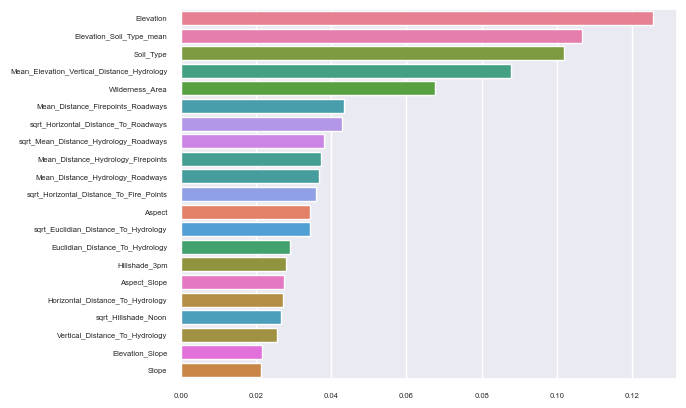

In [41]:
import pandas as pd

# Assuming `features` is a list of your feature names and each model in `models` is a fitted model
feature_importances = pd.DataFrame({name: model.feature_importances_ for name, model in models.items()}, index=features)

# Convert the DataFrame to have features as columns and models as rows
feature_importances = feature_importances.T

# Now you can sort the mean feature importances for each feature across models
sorted_features = feature_importances.mean().sort_values(ascending=False).index.tolist()

sns.barplot(data=feature_importances, orient='h', order=sorted_features)

## Inspect Feature Correlation
To avoid overfitting we should not include too corralated features

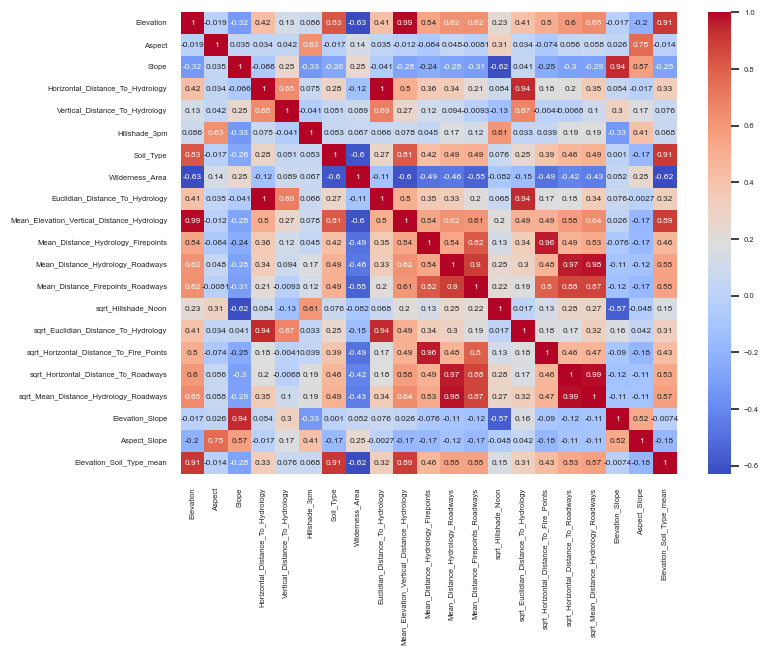

In [42]:
correlation_matrix = train[features].corr()
import seaborn as sns
import matplotlib.pyplot as plt


# Création du heatmap avec seaborn
plt.figure(figsize=(8, 6))  # Optionnel: pour changer la taille de l'image
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Afficher le heatmap
plt.show()

# 5. Perform Hyperparameter Tuning on the Best Model

**Extra Trees Classifier**

Now, I am going to perform hyperparameter tuning on the best model (extra random forests classifier) and try to improve accuracy of the model. Searching and setting the best and optimal set of parameters for a machine learning model can be defined as hyperparameter tuning.

More than 80% accuracy can be interpreted as a reasonable score and managed not to fall the areas of underfitting or overfitting. One can call the model as underfit if s/he gets an accuracy score slightly more than the baseline metric, meaning the model fails to catch and learn from the patterns in the training set.

On the other hand, an accuracy score of more than 95% might show that the model already in the overfitted area. Meaning the model performed very well on the training data and captured the patterns but it might not show the same performance on the test data set. So one cannot conclude that the higher performance metric is always better.

Let's see if I can improve the accuracy of the model by playing with the parameters of [extra trees classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html) without falling into overfitting area.

**I am going to search for the best set of parameters with random search and cross validation.**

In random serach, set of ML model's parameters are defined in a range and inputted to `RandomizedSearchCV`. This algorithm randomly selects some combination of the parameters and compares the defined `score` (accuracy, for this problem) with iterations. Random search runtime and iterations can be controlled with the parameter `n_iter`. This is in contrast to grid search iterations of every single combination of the given parameters. With intuition, one can say that, grid search requires more run-time than random search if a small number of n_iterations is defined. Generally, random search is better when there is a limited knowledge and of the best model hyperparameters and less time. 

K-fold Cross validation is the method used to assess the performance of the hyperparameters on the whole dataset. Rather than splitting the dataset set into 2 static subsets of training and test, dataset is divided equally for the given K, and with iterations different K subsets are trained and tested. In other words, divide the dataset into K folds, and follow the iterative process where first traininig is done on K-1 of the folds and then evaluate performance on the Kth fold. Process is repeated K times, so eventually dataset is tested on every example keeping in mind that each iteration is testing on a subset that did not train on before. At the end of K-fold cross validation, average of the performance metric on each of the K iterations substitutes the final performance measure.

A visualization of cross-validation:

![image](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)



**To perform hyperparameter tuning, we are going to define set of parameters and `RandomizedSearchCV` will look for the best combination with cross validation.**

In [821]:
# The number of trees in the forest algorithm, default value is 10.
n_estimators = [100, 300, 500]

# The minimum number of samples required to split an internal node, default value is 2.
min_samples_split = [2, 3, 5]

# The minimum number of samples required to be at a leaf node, default value is 1.
min_samples_leaf = [1, 3]

# The number of features to consider when looking for the best split, default value is auto.
max_features = ['auto', 'sqrt', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features
}

To find the best combination of the randomly set parameters and apply cross validation, I am going to use the `RandomizedSearchCV` with following arguments:
* `estimator`: the model
* `param_distributions`: the distribution of parameters we defined
* `cv`: K in the K-fold cross validation, number of subsets to create
* `n_iter`: the number of different combinations to try
* `scoring`: which metric to use when evaluating candidates
* `n_jobs`: number of cores to run in parallel (-1 will use all available)
* `verbose`: how much information to display (1 displays a limited amount)
* `return_train_score`: return the training score for each cross-validation fold
* `random_state`: fixes the random number generator used so we get the same results every run

In [822]:
# Create the model
model = ExtraTreesClassifier(random_state=42)

# Create Grid Search object
grid_search = GridSearchCV(estimator=model,
                           param_grid=hyperparameter_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1,
                           return_train_score=True)

# Fit on the training data
grid_search.fit(trees_training, labels_training)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_features': ['auto', 'sqrt', None],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 300, 500]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [823]:
# Print the best estimator from grid search
print(grid_search.best_estimator_)

ExtraTreesClassifier(n_estimators=500, random_state=42)


Here is the best combination of parameters:
* `n_estimators` = 500
* `max_features` = None
* `min_samples_leaf`= 1
* `min_samples_split`= 2

Let's apply those parameters to the extra random forests classifier model and see observe the improvement on the accuracy score.

In [862]:
xrf_classifier_w_random_search = ExtraTreesClassifier(n_estimators=75, 
                                                     max_features=None, 
                                                     min_samples_leaf=1, 
                                                     min_samples_split=2,
                                                     random_state=42)

train_and_evaluate_model(xrf_classifier_w_random_search, X_train, X_valid, y_train, y_valid)


Accuracy: 0.8917474106247911


## Visualization of the best model predictions

I am going to use the [function](https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823) mentioned in the sci-kit learn documentation to print confusion_matrix. Confusion matrix will show the number of predictions made in each category with actual and predicted values, by comparing the actual labels and the prediected labels. 

Fantastic tree confusion matrix will be a 7x7 matrix. I will use normalized confusion matrix, so percentage of actual tree type correctly guessed out of all guesses in that particular category will appear in the diagonal of the matrix and non-diagonal elements will show misslabeled elements by the model. The higher the diagonal percentages of the confusion matrix the better, indicating many correct predictions.

In [863]:
# create set of y_predictions
y_predicted = xrf_classifier_w_random_search.predict(X_valid)

# make a list of cover_types
cover_types = sorted(train['Cover_Type'].value_counts().index.tolist())


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
    # else:
        # print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax



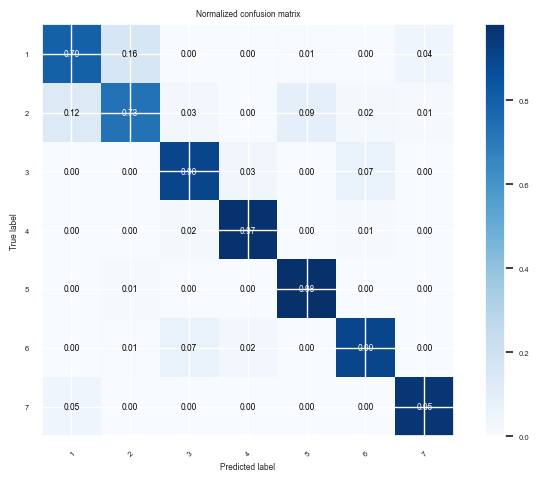

In [864]:
plot_confusion_matrix(y_valid, y_predicted, classes=cover_types, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

Model did pretty good detecting fantastic trees of type 3,4, 5, 6 and 7, and it seems a bit confused to detect types 1 and 2.

# 6. Evaluate the Best Model with Test Data

## 6.1. Align test set with the training set

In [865]:
trees_test = pd.read_csv("/Users/dnn/Data Science for Business 23-25/Master 1 - X/ML II/ML2 Project/data/test-full.csv")
print('Test Data Shape:', trees_test.columns)
# We do not remove outliers from the test set

reverse_one_hot_encode(trees_test, 16, 56, "Soil_Type")
reverse_one_hot_encode(trees_test, 11, 15, "Wilderness_Area")


# make a list of numeric features and create a dataframe with them
all_features_w_label = ["Id"] + continuous_variables + wilderness_areas + ["Wilderness_Area"] + ["Soil_Type"]
trees_test = trees_test[all_features_w_label]


# add linear combinations of columns
trees_test['Euclidian_Distance_To_Hydrology'] = (trees_test['Horizontal_Distance_To_Hydrology']**2 + 
                                                 trees_test['Vertical_Distance_To_Hydrology']**2)**0.5
trees_test['Mean_Elevation_Vertical_Distance_Hydrology'] = (trees_test['Elevation'] + 
                                                            trees_test['Vertical_Distance_To_Hydrology'])/2
trees_test['Mean_Distance_Hydrology_Firepoints'] = (trees_test['Horizontal_Distance_To_Hydrology'] + 
                                                    trees_test['Horizontal_Distance_To_Fire_Points'])/2
trees_test['Mean_Distance_Hydrology_Roadways'] = (trees_test['Horizontal_Distance_To_Hydrology'] + 
                                                  trees_test['Horizontal_Distance_To_Roadways'])/2
trees_test['Mean_Distance_Firepoints_Roadways'] = (trees_test['Horizontal_Distance_To_Fire_Points'] + 
                                                   trees_test['Horizontal_Distance_To_Roadways'])/2


# Applying square root transformation only to the specified columns
for col in columns_to_transform:
    # Adding the transformed columns with a 'sqrt_' prefix
    trees_test['sqrt_' + col] = np.sqrt(trees_test[col])
    new_features.append('sqrt_' + col)
    

# Interaction feature 1: Elevation * Slope
trees_test['Elevation_Slope'] = trees_test['Elevation'] * trees_test['Slope']

# Interaction feature 2: Horizontal_Distance_To_Hydrology * Vertical_Distance_To_Hydrology
trees_test['HD_Hydrology_VD_Hydrology'] = trees_test['Horizontal_Distance_To_Hydrology'] * trees_test['Vertical_Distance_To_Hydrology']

# Interaction feature 3: Aspect * Slope
trees_test['Aspect_Slope'] = trees_test['Aspect'] * trees_test['Slope']


statistics = ['mean']  # the type of stat
gb_features = ['Soil_Type']
target_feature = 'Elevation'
tmp_name = '_'.join(gb_features)
for stat in statistics:
    name = f'{target_feature}_{tmp_name}_{stat}'
    feat = f'{target_feature}'
    new_features.append(name)
    for data in [trees_test]:
        data[name] = data.groupby(gb_features)[feat].transform(stat)

        
        
X_test = trees_test[features]
X_test_scaled = scaler.transform(X_test)
print('Test Data Shape:', X_test.shape)
X_test

Test Data Shape: Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soi

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0            2596      51      3                               258   
1            2590      56      2                               212   
2            2804     139      9                               268   
3            2785     155     18                               242   
4            2595      45      2                               153   
...           ...     ...    ...                               ...   
581007       2396     153     20                                85   
581008       2391     152     19                                67   
581009       2386     159     17                                60   
581010       2384     170     15                                60   
581011       2383     165     13                                60   

        Vertical_Distance_To_Hydrology  Hillshade_3pm  Soil_Type  \
0                                    0            148         29   
1                                   -6            151         29   
2                                   65            135         12   
3                                  118            122         30   
4                                   -1            150         29   
...                                ...            ...        ...   
581007                              17            118          2   
581008                              12            119          2   
581009                               7            130          2   
581010                               5            143          2   
581011                               4            141          2   

        Wilderness_Area  Mean_Elevation_Vertical_Distance_Hydrology  \
0                     1                                      1298.0   
1                     1                                      1292.0   
2                     1                                      1434.5   
3                     1                                      1451.5   
4                     1                                      1297.0   
...                 ...                                         ...   
581007                3                                      1206.5   
581008                3                                      1201.5   
581009                3                                      1196.5   
581010                3                                      1194.5   
581011                3                                      1193.5   

        Mean_Distance_Hydrology_Firepoints  Mean_Distance_Firepoints_Roadways  \
0                                   3268.5                             3394.5   
1                                   3218.5                             3307.5   
2                                   3194.5                             4650.5   
3                                   3226.5                             4650.5   
4                                   3162.5                             3281.5   
...                                    ...                                ...   
581007                               461.0                              472.5   
581008                               456.0                              470.0   
581009                               457.0                              472.0   
581010                               462.0                              477.0   
581011                               467.5                              471.0   

        sqrt_Hillshade_Noon  sqrt_Euclidian_Distance_To_Hydrology  \
0                 15.231546                             16.062378   
1                 15.329710                             14.563135   
2                 15.427249                             16.606319   
3                 15.427249                             16.408411   
4                 15.297059                             12.369449   
...                     ...                                   ...   
581007            15.394804              

## Make sure of the test data shape and there aren't any missing values

In [866]:
print(X_test.isnull().sum())

Elevation                                     0
Aspect                                        0
Slope                                         0
Horizontal_Distance_To_Hydrology              0
Vertical_Distance_To_Hydrology                0
Hillshade_3pm                                 0
Soil_Type                                     0
Wilderness_Area                               0
Mean_Elevation_Vertical_Distance_Hydrology    0
Mean_Distance_Hydrology_Firepoints            0
Mean_Distance_Firepoints_Roadways             0
sqrt_Hillshade_Noon                           0
sqrt_Euclidian_Distance_To_Hydrology          0
sqrt_Horizontal_Distance_To_Fire_Points       0
sqrt_Horizontal_Distance_To_Roadways          0
sqrt_Mean_Distance_Hydrology_Roadways         0
Elevation_Soil_Type_mean                      0
dtype: int64


There are no NA values in the test data set, which is ready to be inputted in a ML model.
In the training set, there are more than 12000 rows, and the test has much more rows (almost 500.000) than the training set. Let's see how the model will deal with a much bigger dataset!

In [867]:
# generate predictions for test data
test_predictions = xrf_classifier_w_random_search.predict(X_test)

# write results to the dataframe and create file for submission
output = pd.DataFrame({'Id': trees_test["Id"],
                       'Cover_Type': test_predictions})


# Whe Prediction, don't forget to add 1 to Y
output['Cover_Type'] += 1 
output

Id  Cover_Type
0            1           2
1            2           2
2            3           2
3            4           2
4            5           2
...        ...         ...
581007  581008           3
581008  581009           3
581009  581010           3
581010  581011           3
581011  581012           3

[581012 rows x 2 columns]

In [868]:
output.to_csv('/Users/dnn/Data Science for Business 23-25/Master 1 - X/ML II/ML2 Project/Submissions/submission.csv', index=False)